In [167]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# 1. Setup

In [168]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [169]:
# load dataset

data = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv')

# 2. Quick data insights

In [170]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Text(0, 0.5, 'Instances')

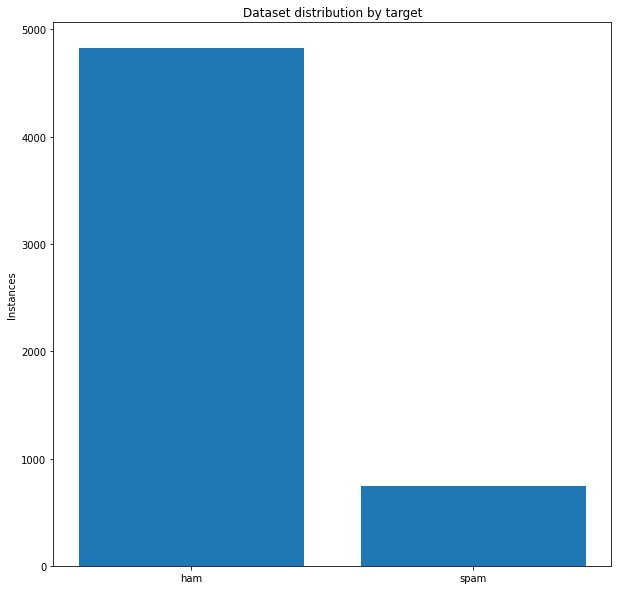

In [172]:
target_valuecnt = data['v1'].value_counts()
plt.figure(figsize=(10, 10))
plt.bar(['ham', 'spam'], target_valuecnt)
plt.title('Dataset distribution by target')
plt.ylabel('Instances')

#### As we can see target label is imbalanced which can cause problems later. 
#### We could consider using resampling techniques, but right now we will leave it as it is

# Preparing data

In [173]:
# deleting unnamed columns
data_dp = data.drop(data.columns[2:], axis=1)
data_dp.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [174]:
# rename v1 and v2 columns to target and messagage respectively
data_dp = data_dp.rename(columns= {'v1': 'target', 'v2': 'message'})

In [175]:
value_cnts = data_dp['target'].value_counts()
value_cnts

ham     4825
spam     747
Name: target, dtype: int64

In [176]:
# replace ham as 0, and spam as 1

data_dp['target'].replace(to_replace='ham', value=0, inplace=True)
data_dp['target'].replace(to_replace='spam', value=1, inplace=True)

# Most frequent words visualization

In [177]:
# extract from df only spam messages, count words that appears the most frequently and plot them

df_spam = data_dp[data_dp['target'] == 1]
spam_msg_list = df_spam['message'].tolist()
spam_sum = ' '.join(spam_msg_list).lower()

df_ham = data_dp[data_dp['target'] == 0]
ham_msg_list = df_spam['message'].tolist()
ham_sum = ' '.join(ham_msg_list).lower()

In [178]:
# spam wordclodd
wordcloud_spam = WordCloud(max_words=100, max_font_size=60, background_color='white').generate(spam_sum)
# ham worldcloud
wordcloud_ham = WordCloud(max_words=100, max_font_size=60, background_color='white').generate(ham_sum)


Text(0.5, 1.0, 'Most freq spam words')

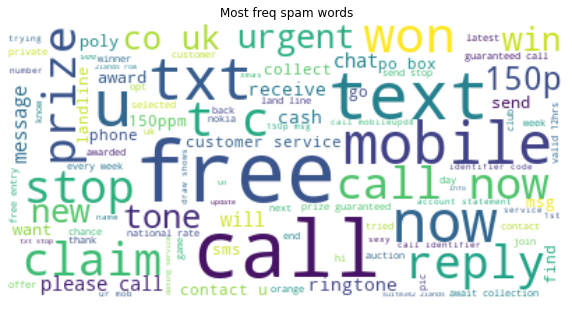

In [179]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Most freq spam words')

Text(0.5, 1.0, 'Most freq ham words')

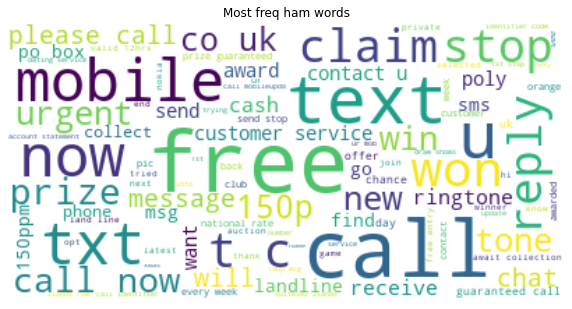

In [180]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Most freq ham words')

## Preprocessing data

### Topic modeling

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
msg_vectorized = vectorizer.fit_transform(data_dp['message'])
msg_columns = vectorizer.get_feature_names()
target_label = data_dp['target']


In [182]:
vect_df = pd.DataFrame(data=msg_vectorized.toarray(), columns=msg_columns)
vect_df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training

In [183]:
# ssplit data
X_train, X_test, Y_train, Y_test = train_test_split(vect_df, target_label, test_size=0.2, random_state=42)


In [184]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4457, 8357), (1115, 8357), (4457,), (1115,))

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# for evaluation
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score


Because of our dataset is skewed (there is more negative labels than positivie) we shouldnt use accuracy in terms of evaluation our models

In [186]:
lin_svc = LinearSVC()
log_reg = LogisticRegression()
rnd_clf = RandomForestClassifier()
grb_clf = GradientBoostingClassifier()
tree_clf = DecisionTreeClassifier()

clf_list = [lin_svc, log_reg, rnd_clf, grb_clf, tree_clf]

for clf in clf_list:
    clf.fit(X_train, Y_train)
    predict = clf.predict(X_test)
    res = f1_score(Y_test, predict)
    print(clf, 'F-score:', res)

LinearSVC() F-score: 0.8960573476702509
LogisticRegression() F-score: 0.7459016393442623
RandomForestClassifier() F-score: 0.9136690647482014
GradientBoostingClassifier() F-score: 0.8015873015873016
DecisionTreeClassifier() F-score: 0.8767123287671234


Based on f-score the best results perform Linear SVC, and RandomForest with default hyperparams

Confusion_matrix
 [[961   4]
 [ 25 125]]
Recall: 0.8333333333333334
Precision: 0.9689922480620154


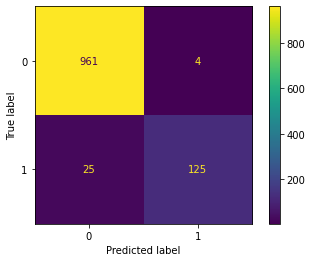

In [187]:
# confusin matrix, precision and recall scores for linearSVC
y_pred = lin_svc.predict(X_test)
cnf_mx = confusion_matrix(Y_test, y_pred)
print('Confusion_matrix\n', cnf_mx)
print('Recall:', recall_score(Y_test, y_pred))
print('Precision:', precision_score(Y_test, y_pred))
plot_confusion_matrix(lin_svc, X_test, Y_test)


Confusion_matrix
 [[964   1]
 [ 23 127]]
Recall: 0.8466666666666667
Precision: 0.9921875


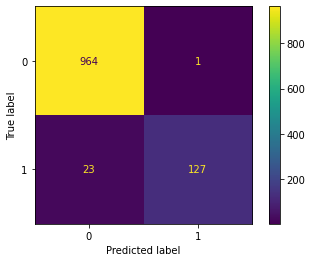

In [188]:
# confusin matrix, precision and recall scores for RandomForest
y_pred = rnd_clf.predict(X_test)
cnf_mx = confusion_matrix(Y_test, y_pred)
print('Confusion_matrix\n', cnf_mx)
print('Recall:', recall_score(Y_test, y_pred))
print('Precision:', precision_score(Y_test, y_pred))
plot_confusion_matrix(rnd_clf, X_test, Y_test)

For spam classification task precision is more valueable than recall because we don't miss importants mails. 

# Conslusion

### RandomForestRegressor perform very well with test data. With over 99% of precision and 84% recall we can be sure that model will properly mark spam mails